# Importando Dados e Traduzindo Dados

## Importando Base de Dados

In [65]:
import pandas as pd

dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


---

## Traduzindo Colunas e Campos

In [66]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [67]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_da_semana',
    'time': 'refeicao',
    'size': 'total_de_pessoas'
}

In [68]:
type(dados)

pandas.core.frame.DataFrame

In [69]:
gorjetas = dados.rename(columns=renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [70]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [71]:
sim_nao = {
    'No' : 'Não',
    'Yes': 'Sim'
}

In [72]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [73]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [74]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [75]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [76]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [77]:
dias = {
        'Sun': 'Domingo',
        'Sat': 'Sabado',
        'Thur': 'Quinta',
        'Fri': 'Sexta'
}

In [78]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [79]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [80]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [81]:
gorjetas.refeicao.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [82]:
refeicao = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [83]:
gorjetas.refeicao = gorjetas.refeicao.map(refeicao)

In [84]:
gorjetas.head(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


---
---

# Comparando Distribuições de Maneira Explanatória

## Seaborn e Scatterplot

In [85]:
import seaborn as sns

In [86]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: matplotlib, pandas, scipy, numpy
Required-by: missingno


### Análise 1 - Valor da Conta e Gorjeta

In [87]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana', 'refeicao',
       'total_de_pessoas'],
      dtype='object')

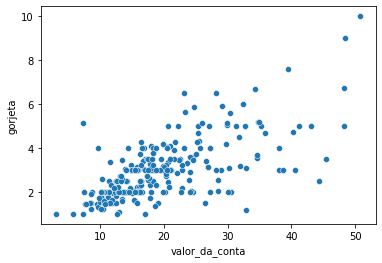

In [88]:
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)
valor_gorjeta

<font color = gree> **Visualmente o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [89]:
print(f'A base de dados contém {gorjetas.shape[0]}')
print(f'Registros não nulos:')
gorjetas.count()

A base de dados contém 244
Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
refeicao            244
total_de_pessoas    244
dtype: int64

---

## Coluna Porcentagem

In [90]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [91]:
gorjetas['porcentagem'] = (gorjetas.gorjeta / gorjetas.valor_da_conta) * 100

In [92]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765


In [93]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [94]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


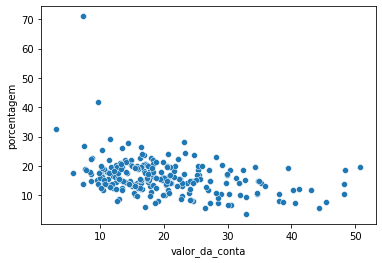

In [95]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

<font color = gree> **Visualmente o valor da conta não é proporcional ao valor da gorjeta**

---

## Relplot e Implot

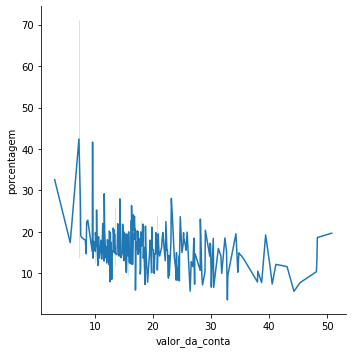

In [96]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

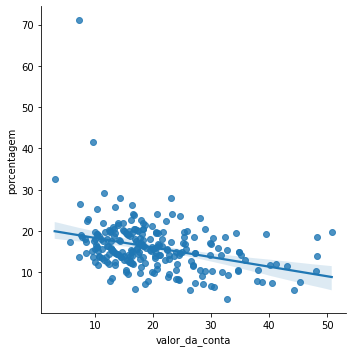

In [97]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

In [98]:
# primeiro_plot.set_title('Análise do valor da gorjeta em função do valor da conta')
# primeiro_plot.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')
# imagem = primeiro_plot.get_figure()
# imagem.savefig('imagem.png')

---
---

# Analisando de Forma Visual e Descritiva

## Análise Descritiva

In [99]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


### Análise 2 - Sobremesa

In [100]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [101]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


---

## Análise visual

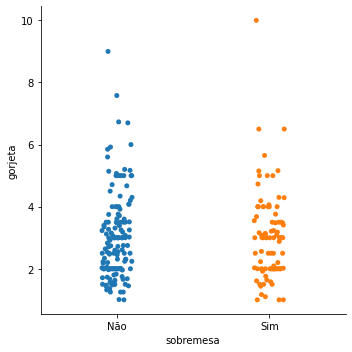

In [102]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

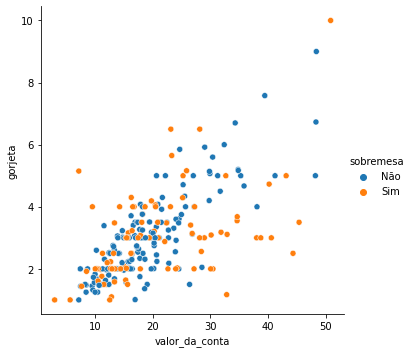

In [103]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

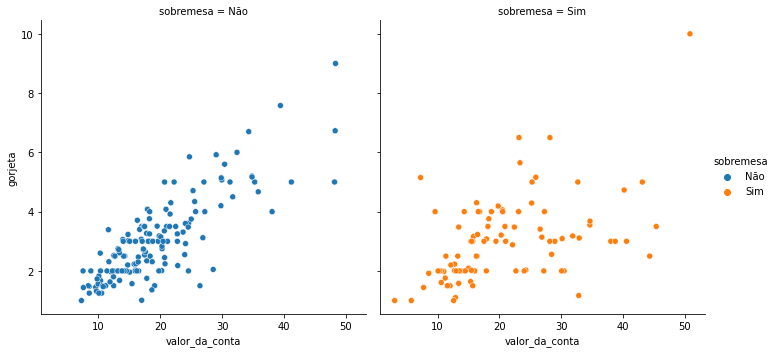

In [104]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

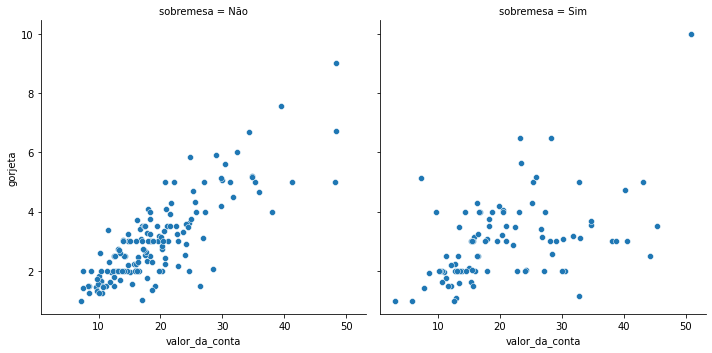

In [105]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)

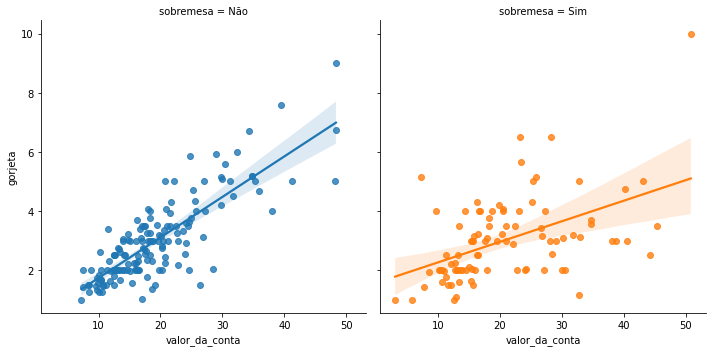

In [106]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', data = gorjetas)

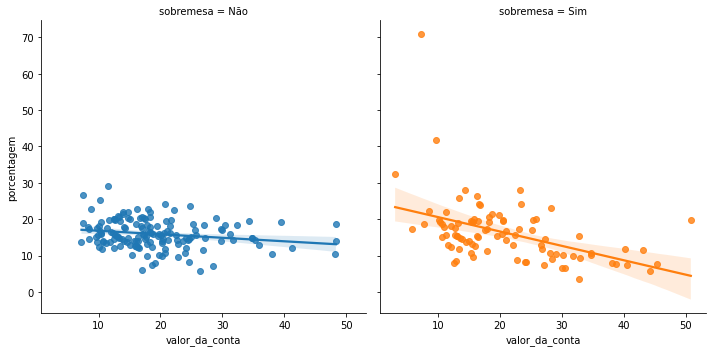

In [107]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue='sobremesa', col='sobremesa', data = gorjetas)

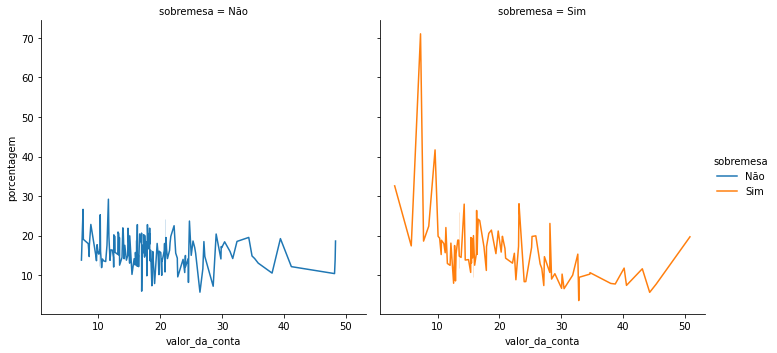

In [108]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

<font color = gree> Visualmente existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

---

## Teste de Hipótese

**H<sup>null</sup>**

> **A Distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A Distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [109]:
from scipy.stats import ranksums

In [110]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sobremesa

56      7.89
58     15.66
60     15.82
61     14.48
62     17.97
       ...  
234    19.32
236     7.94
237     3.56
240     7.36
241     8.82
Name: porcentagem, Length: 93, dtype: float64

In [111]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0       5.94
1      16.05
2      16.66
3      13.98
4      14.68
       ...  
235    12.41
238    13.03
239    20.39
242     9.82
243    15.97
Name: porcentagem, Length: 151, dtype: float64

In [112]:
r = ranksums(sobremesa, sem_sobremesa)

In [113]:
print(f'O valor de p é {r.pvalue}')

O valor de p é 0.558850059321255


**H<sup>null</sup>**

> **A Distribuição da taxa da gorjeta é a mesma nos dois grupos**

---
---

# Comparando e Explorando Os Dias Da Semana

## Dias Da Semana

In [114]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,refeicao,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [115]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

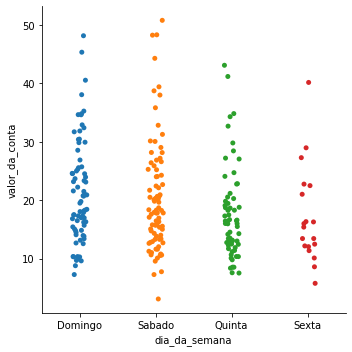

In [121]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

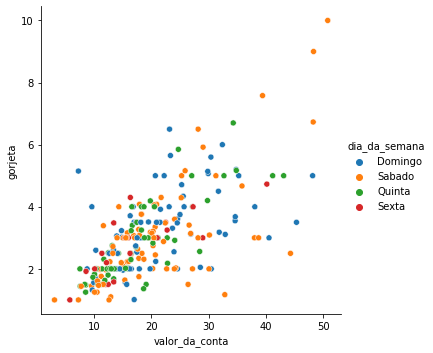

In [124]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

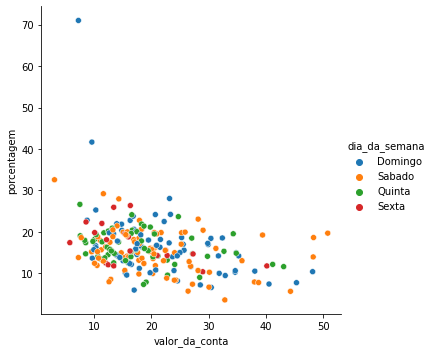

In [125]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

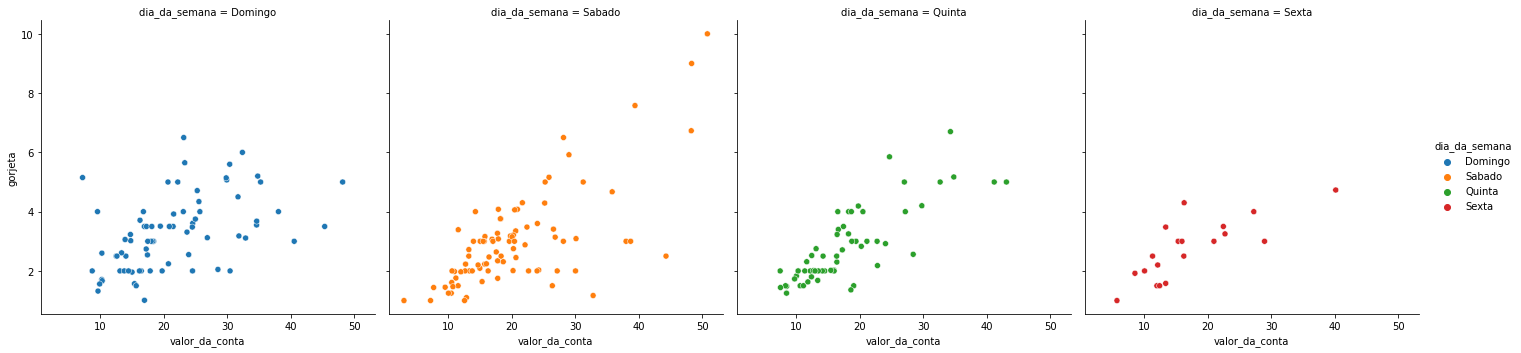

In [126]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

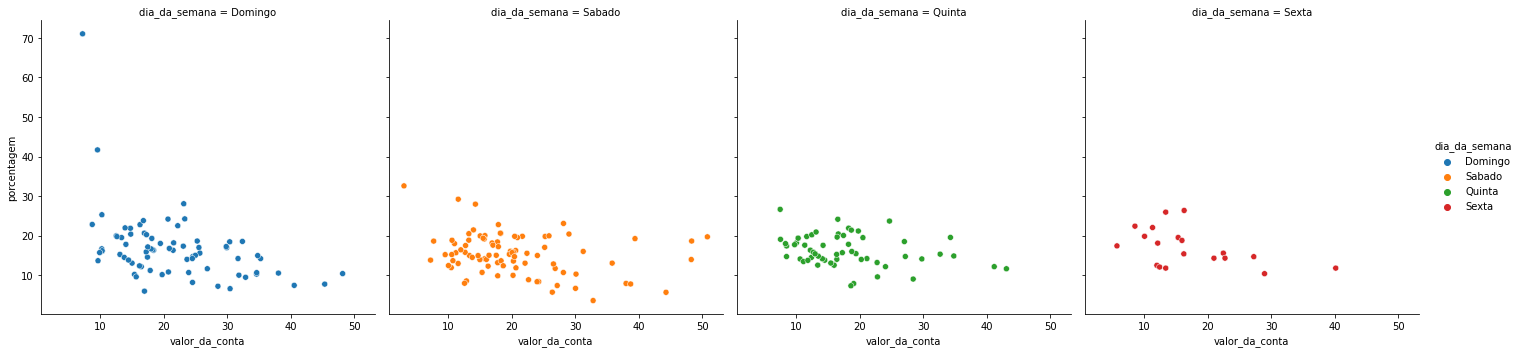

In [128]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

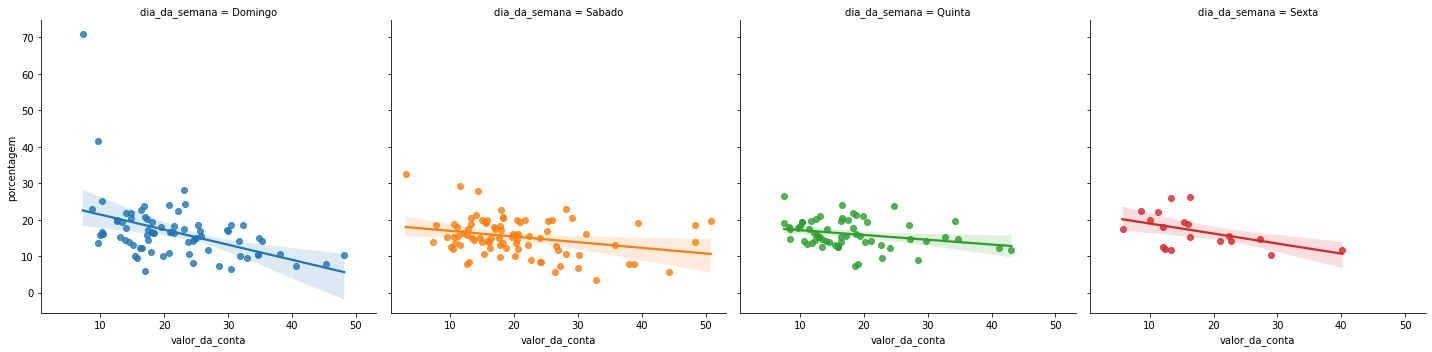

In [129]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

---

## Análise Descritiva

In [135]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print(f'A média geral das gorjetas é de {media_geral_gorjetas:.2f}')

A média geral das gorjetas é de 3.00


In [136]:
gorjetas.groupby(by = 'dia_da_semana').mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,16.689605
Quinta,17.682742,2.771452,2.451613,16.126452
Sabado,20.441379,2.993103,2.517241,15.314598
Sexta,17.151579,2.734737,2.105263,16.991579


In [138]:
gorjetas.groupby(by = 'dia_da_semana').mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sabado,20.441379,2.993103,15.314598
Sexta,17.151579,2.734737,16.991579


In [141]:
print(f'Frequência dos dias:\n{gorjetas.dia_da_semana.value_counts()}')

Frequência dos dias:
Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64


---

## Teste de Hipótese

**H<sup>null</sup>**

>A distribuição do valor da conta é igual no sábado e no domindo

**H<sup>alt</sup>**

>A distribuição do valor da conta não é igual no sábado e no domindo

In [142]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [143]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [145]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor de p é {r2.pvalue}')

O valor de p é 0.3576728477868443


**H<sup>null</sup>**

>A distribuição do valor da conta é igual no sábado e no domindo